In [1]:
!pip install tensorflow_addons
!pip install kaggle

     |████████████████████████████████| 1.1 MB 3.8 MB/s 


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from tqdm import tqdm
import tensorflow_addons as tfa
import random
from sklearn.preprocessing import MultiLabelBinarizer
from PIL import Image

pd.set_option("display.max_columns", None)

print('success')

success


In [3]:
import os
 
os.environ['KAGGLE_USERNAME'] = 'tanliyuanmarcus'
os.environ['KAGGLE_KEY'] = '9a4c74345e904ba391dd69c204fc8fdc'
 
from kaggle.api.kaggle_api_extended import KaggleApi
 
api = KaggleApi()
api.authenticate()
 
competitions = api.competitions_list()
print(competitions)

[mpetitions/contradictory-my-dear-watson, mpetitions/gan-getting-started, mpetitions/store-sales-time-series-forecasting, mpetitions/tpu-getting-started, mpetitions/digit-recognizer, mpetitions/titanic, mpetitions/house-prices-advanced-regression-techniques, mpetitions/connectx, mpetitions/nlp-getting-started, mpetitions/spaceship-titanic, mpetitions/competitive-data-science-predict-future-sales, mpetitions/uw-madison-gi-tract-image-segmentation, mpetitions/kore-2022, mpetitions/foursquare-location-matching, mpetitions/jpx-tokyo-stock-exchange-prediction, mpetitions/phase-ii-widsdatathon2022, mpetitions/us-patent-phrase-to-phrase-matching, mpetitions/image-matching-challenge-2022, mpetitions/sorghum-id-fgvc-9, mpetitions/hotel-id-to-combat-human-trafficking-2022-fgvc9]


In [4]:
!kaggle competitions download -c plant-pathology-2021-fgvc8

100% 14.9G/14.9G [05:00<00:00, 59.8MB/s]
100% 14.9G/14.9G [05:00<00:00, 53.1MB/s]


In [5]:
!unzip plant-pathology-2021-fgvc8.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/e00c97b2de4749ce.jpg  
  inflating: train_images/e00df890cfe62736.jpg  
  inflating: train_images/e00ed0bf43a87f25.jpg  
  inflating: train_images/e00f759d65d52887.jpg  
  inflating: train_images/e00f934d9e50ad5b.jpg  
  inflating: train_images/e00fce341cb63da5.jpg  
  inflating: train_images/e010c7c35ecf3d1c.jpg  
  inflating: train_images/e01112939f783fec.jpg  
  inflating: train_images/e01592da4d71b8be.jpg  
  inflating: train_images/e0189acaf8cf80fd.jpg  
  inflating: train_images/e0189e4999bdd0fa.jpg  
  inflating: train_images/e01ae16d4a759cb5.jpg  
  inflating: train_images/e01dc39ccb2b4ccb.jpg  
  inflating: train_images/e01e42d90c66f3f3.jpg  
  inflating: train_images/e01e870bec65f40f.jpg  
  inflating: train_images/e01f17e0187fb80f.jpg  
  inflating: train_images/e01f503cb752e6c5.jpg  
  inflating: train_images/e024b69a784e9fc3.jpg  
  inflating: train_images/e026b4c23c9fcfc4.jpg  
  inflating: train

In [6]:
!mv test_images/* train_images

In [7]:
import os
import random
import shutil

files_list = []

for root, dirs, files in os.walk("train_images"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            files_list.append(os.path.join(root, file))


#print images
#lets me count and print the amount of jpeg,jpg,pmg 
file_count = len(files_list) 
print(file_count)

x = file_count // 20 # Move 5% of files from train to test

# print files_list   
filesToCopy = random.sample(files_list, x)  #prints x random files from list 

destPath = "test_images"

# if destination dir does not exists, create it
if os.path.isdir(destPath) == False:
        os.makedirs(destPath)

# iteraate over all random files and move them
for file in filesToCopy:
    shutil.move(file, destPath)

18635


In [8]:
from attr import field
import pandas as pd


all_data = pd.read_csv('./all_data.csv',index_col='image')

# Convert to dictionary because pandas got issue recognizing values
dic = all_data.to_dict()
dic = dic['labels']

# find all files in the test directory
from os import listdir
from os.path import isfile, join
mypath = './test_images'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

test_dic = {}
for file in onlyfiles:
    test_dic[file] = dic[file] # assign the value in the original dictionary to the test dictionary
    dic.pop(file,None) # remove the file in dictionary

train_dic = dic # Assign the name for consistency


# convert dictionaries to csv files
import csv
# Write train.csv
with open('train.csv','w',newline='') as csvfile:
    fieldnames = ['image','labels']
    writer = csv.DictWriter(csvfile,fieldnames=fieldnames)

    writer.writeheader()
    for key in train_dic:
        writer.writerow({'image': key, 'labels': train_dic[key]})

with open('test.csv','w',newline='') as csvfile:
    fieldnames = ['image','labels']
    writer = csv.DictWriter(csvfile,fieldnames=fieldnames)

    writer.writeheader()
    for key in test_dic:
        writer.writerow({'image': key, 'labels': test_dic[key]})

### Processing images
#### Example taken from: https://www.kaggle.com/seyunhan/inceptionresnetv2-keras-pbl4

We load the train,test,val images here

In [9]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [10]:
# train['image'] = train['image']
train['labels'] = train['labels'].apply(lambda string: string.split(' '))
train

,image,labels
0,800113bb65efe69e.jpg,[healthy]
1,80070f7fb5e2ccaa.jpg,[scab]
2,80077517781fb94f.jpg,[scab]
3,800cbf0ff87721f8.jpg,[complex]
4,800edef467d27c15.jpg,[healthy]
...,...,...
17696,fffb900a92289a33.jpg,[healthy]
17697,fffc488fa4c0e80c.jpg,[scab]
17698,fffc94e092a59086.jpg,[rust]
17699,fffe105cf6808292.jpg,"[scab, frog_eye_leaf_spot]"


Index(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust',
       'scab'],
      dtype='object')
complex               2031
frog_eye_leaf_spot    4127
healthy               4394
powdery_mildew        1206
rust                  1980
scab                  5446
dtype: int64
['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']


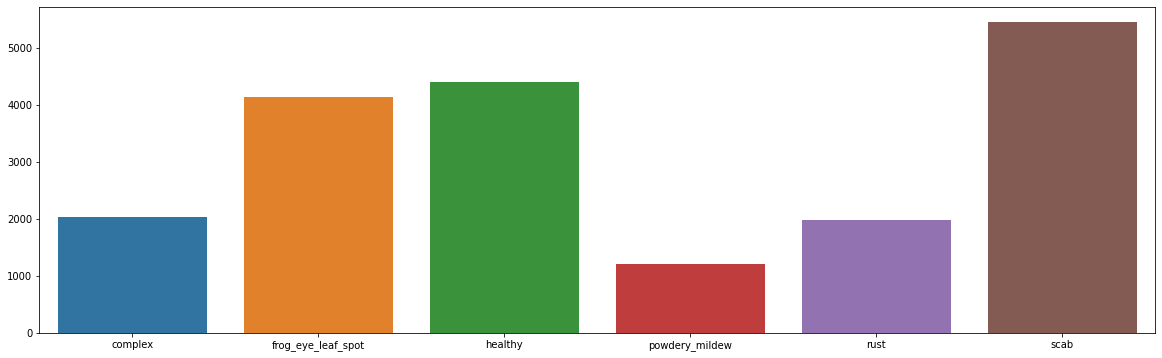

In [11]:
s = list(train['labels'])
mlb = MultiLabelBinarizer()
trainx = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=train.index)
print(trainx.columns)
print(trainx.sum())

labels = list(trainx.sum().keys())
print(labels)
label_counts = trainx.sum().values.tolist()

fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(x= labels, y= label_counts, ax=ax)

Move images

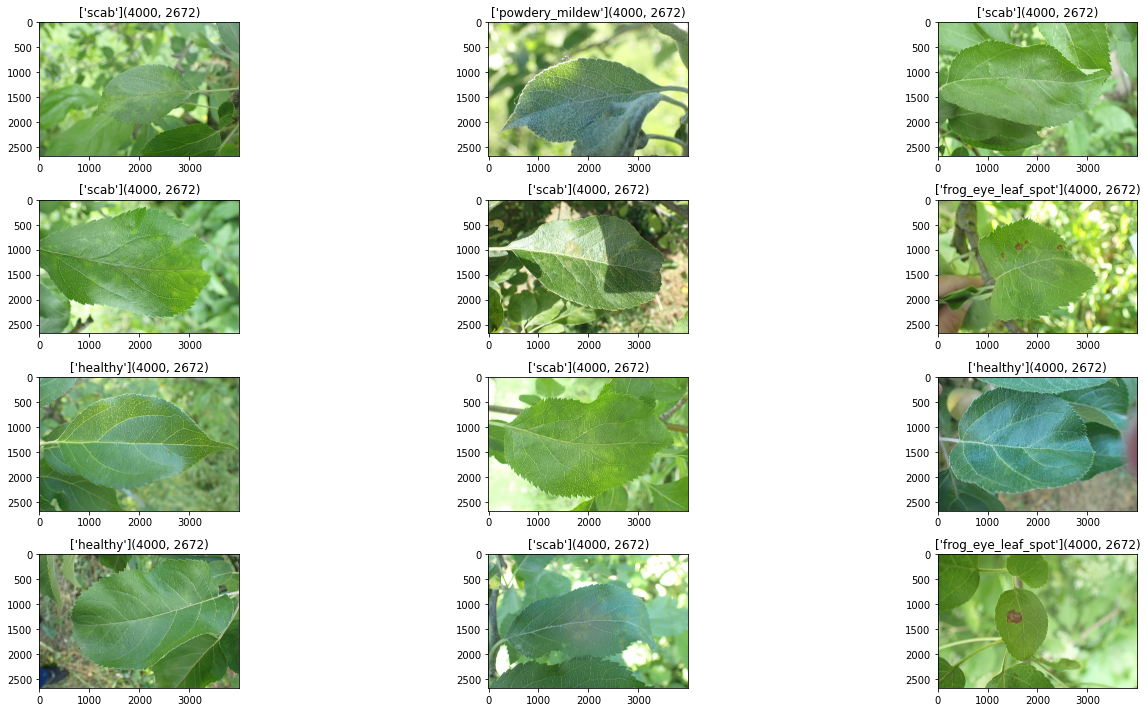

In [12]:
fig1 = plt.figure(figsize=(26,10))

for i in range(1, 13):
    
    rand =  random.randrange(1, len(list(train['image'])))
    sample = os.path.join('./train_images/', train['image'][rand])
    
    img = Image.open(sample)
    
    ax = fig1.add_subplot(4,3,i)
    ax.imshow(img)
    
    title = f"{train['labels'][rand]}{img.size}"
    plt.title(title)
    
    fig1.tight_layout()

In [13]:
from keras.preprocessing.image import ImageDataGenerator

TARGET_SIZE = 300

# More augmentation
datagen = ImageDataGenerator(rescale=1/255.0,
                            rotation_range=20,
                            zoom_range=0.1,
                            shear_range=0.05,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            validation_split=0.1)

train_generator = datagen.flow_from_dataframe(
    train,
    directory='./train_images',
    subset='training',
    x_col='image',
    y_col='labels',
    target_size=(TARGET_SIZE,TARGET_SIZE),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=444
    )

#'../input/plant-pathology-2021-fgvc8/train_images'
valid_generator = datagen.flow_from_dataframe(
    train,
    directory='./train_images',
    subset='validation',
    x_col='image',
    y_col='labels',
    target_size=(TARGET_SIZE,TARGET_SIZE),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=444
    )

Found 15931 validated image filenames belonging to 6 classes.
Found 1770 validated image filenames belonging to 6 classes.


# Image Classification Using EfficientNetB3

In [14]:
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB3

NUM_CLASSES = 6
IMG_SIZE = 300
size = (IMG_SIZE, IMG_SIZE)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = 'efficientnetb3.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
outputs = EfficientNetB3(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

with tf.device('/GPU:0'):
  hist = model.fit(train_generator, \
                    validation_data=valid_generator, \
                   epochs=50, batch_size=8, verbose=2, shuffle=True, \
                   callbacks=[early_stopping, model_checkpoint])
  model.load_weights(bst_model_path)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, 6)                10792757  
                                                                 
Total params: 10,792,757
Trainable params: 10,705,454
Non-trainable params: 87,303
_________________________________________________________________
Epoch 1/50
498/498 - 2469s - loss: 0.5185 - accuracy: 0.2905 - val_loss: 0.4849 - val_accuracy: 0.1915 - 2469s/epoch - 5s/step
Epoch 2/50
498/498 - 2425s - loss: 0.4135 - accuracy: 0.3776 - val_loss: 0.3717 - val_accuracy: 0.4373 - 2425s/epoch - 5s/step
Epoch 3/50
498/498 - 2363s - loss: 0.3893 - accuracy: 0.4311 - val_loss: 0.7719 - val_accuracy: 0.3475 - 2363s/epoch - 5s/step
Epoch 4/50
498/498 - 2357s - loss: 0.3657 - accuracy: 0.495

In [ ]:
# from tensorflow.keras import layers
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.applications import EfficientNetB3

# NUM_CLASSES = 6
# IMG_SIZE = 300
# size = (IMG_SIZE, IMG_SIZE)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# bst_model_path = 'efficientnetb3.h5'
# model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)


# inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# outputs = EfficientNetB3(include_top=True, weights=None, classes=NUM_CLASSES)(img_augmentation(inputs))
# model = tf.keras.Model(inputs, outputs)
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] )
# model.summary()

# with tf.device('/GPU:0'):
#   # hist = model.fit(train_x, train_y, \
#   #                  validation_data=(test_x, test_y), \
#   #                  epochs=50, batch_size=4, verbose=2, shuffle=True, \
#   #                  callbacks=[early_stopping, model_checkpoint])
#   model.load_weights(bst_model_path)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 img_augmentation (Sequentia  (None, 300, 300, 3)      0         
 l)                                                              
                                                                 
 efficientnetb3 (Functional)  (None, 6)                10792757  
                                                                 
Total params: 10,792,757
Trainable params: 10,705,454
Non-trainable params: 87,303
_________________________________________________________________


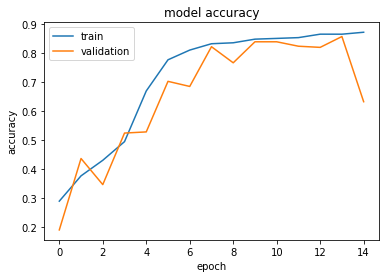

In [15]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
plot_hist(hist)

In [16]:
from google.colab import files
files.download('/content/efficientnetb3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing Efficient Model On Unseen data

In [18]:
from keras.preprocessing.image import ImageDataGenerator
import time

test_data = datagen.flow_from_dataframe(
    test,
    directory = './test_images',
    x_col="image",
    y_col= None,
    color_mode="rgb",
    target_size = (300,300),
    classes=None,
    class_mode=None,
    batch_size=32,
    shuffle=False,
    seed=40,
)

start = time.clock()
preds = model.predict(test_data)
print(preds)
end = time.clock()
print(end - start)
preds = preds.tolist()

# {0: 'complex', 1: 'frog_eye_leaf_spot', 2: 'healthy', 3: 'powdery_mildew', 4: 'rust', 5: 'scab'}
threshold = {0: 0.26, # Complex
             5: 0.61, # scab
             1: 0.7, # frog eye leaf spot
             4: 0.5, # rust
             3: 0.5, # powdery mildew
             2: 0.3} #healthy

             
# Can set different threshold here
indices = []
for pred in preds:
    temp = []
    for category in pred:
        if category>=threshold[pred.index(category)]: #assigning a different threshold to each disease
            temp.append(pred.index(category))
    if temp!=[]:
        pass
    else:
        temp.append(np.argmax(pred))
    # only add the predicted healthy labels, remove others
    if 2 in temp:
        temp = [2] # Resets the list 
    indices.append(temp)
    
print(indices[:10])

Found 931 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[[2.06128036e-07 9.32115142e-07 9.99984145e-01 7.77853347e-06
  5.94805911e-08 6.88798946e-06]
 [2.05734167e-02 5.63571276e-03 6.09356575e-02 2.99085617e-01
  2.48883618e-03 6.11280799e-01]
 [8.94089753e-05 9.20228849e-05 9.45131353e-04 4.98951267e-05
  1.00626075e-05 9.98813391e-01]
 ...
 [2.64794789e-06 1.76983904e-05 1.05140020e-06 5.22923699e-07
  2.67564644e-07 9.99977827e-01]
 [8.32283229e-04 9.89385545e-01 3.55727097e-04 2.45099742e-04
  6.39359048e-03 2.78773461e-03]
 [1.52042702e-07 1.05561401e-06 6.59693001e-07 1.73757641e-07
  3.06328936e-08 9.99997973e-01]]
135.56565399999818
[[2], [5], [5], [1], [1], [1], [5], [5], [1], [0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [19]:
train_generator = datagen.flow_from_dataframe(
    train,
    directory='./train_images',
    subset='training',
    x_col='image',
    y_col='labels',
    target_size=(300,300),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=444
    )

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

testlabels = []


for image in indices:
    temp = []
    for i in image:
        temp.append(str(labels[i]))
    testlabels.append(' '.join(temp))

print(testlabels[:10])

Found 15931 validated image filenames belonging to 6 classes.
{0: 'complex', 1: 'frog_eye_leaf_spot', 2: 'healthy', 3: 'powdery_mildew', 4: 'rust', 5: 'scab'}
['healthy', 'scab', 'scab', 'frog_eye_leaf_spot', 'frog_eye_leaf_spot', 'frog_eye_leaf_spot', 'scab', 'scab', 'frog_eye_leaf_spot', 'complex']


In [20]:
actuallabels = list(test['labels'])
print(actuallabels[:10])

['healthy', 'powdery_mildew', 'scab', 'scab frog_eye_leaf_spot', 'frog_eye_leaf_spot', 'scab frog_eye_leaf_spot', 'scab', 'scab', 'frog_eye_leaf_spot', 'complex']


In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(actuallabels,testlabels)
print(f"Test accuracy score: {accuracy}")

Test accuracy score: 0.8163265306122449


In [35]:
actual_test = pd.read_csv('sample_submission.csv')

In [27]:
!unzip actual_test_images.zip

Archive:  actual_test_images.zip
   creating: actual_test_images/
  inflating: __MACOSX/._actual_test_images  
  inflating: actual_test_images/c7b03e718489f3ca.jpg  
  inflating: __MACOSX/actual_test_images/._c7b03e718489f3ca.jpg  
  inflating: actual_test_images/85f8cb619c66b863.jpg  
  inflating: __MACOSX/actual_test_images/._85f8cb619c66b863.jpg  
  inflating: actual_test_images/ad8770db05586b59.jpg  
  inflating: __MACOSX/actual_test_images/._ad8770db05586b59.jpg  


In [28]:
for img_name in tqdm(actual_test['image']):
    path = './actual_test_images/'+str(img_name)
    with PIL.Image.open(path) as img:
        img = img.resize((300,300))
        img.save(f'./actual_test_images/{img_name}')

100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


In [30]:
actual_test_data = datagen.flow_from_dataframe(
    actual_test,
    directory = './actual_test_images',
    x_col="image",
    y_col= None,
    color_mode="rgb",
    target_size = (300,300),
    classes=None,
    class_mode=None,
    batch_size=32,
    shuffle=False,
    seed=40,
)

actual_preds = model.predict(actual_test_data)
print(actual_preds)
actual_preds = actual_preds.tolist()

# {0: 'complex', 1: 'frog_eye_leaf_spot', 2: 'healthy', 3: 'powdery_mildew', 4: 'rust', 5: 'scab'}
threshold = {0: 0.26, # Complex
             5: 0.61, # scab
             1: 0.7, # frog eye leaf spot
             4: 0.5, # rust
             3: 0.5, # powdery mildew
             2: 0.3} #healthy

             
# Can set different threshold here
indices = []
for pred in actual_preds:
    temp = []
    for category in pred:
        if category>=threshold[pred.index(category)]: #assigning a different threshold to each disease
            temp.append(pred.index(category))
    if temp!=[]:
        pass
    else:
        temp.append(np.argmax(pred))
    # only add the predicted healthy labels, remove others
    if 2 in temp:
        temp = [2] # Resets the list 
    indices.append(temp)
    
print(indices)

Found 3 validated image filenames.
[[1.19449291e-02 2.69849971e-03 1.28338032e-03 9.65830982e-01
  2.29056831e-03 1.59515310e-02]
 [9.11569715e-01 5.29476292e-02 4.62195196e-04 9.29640490e-04
  1.27190584e-03 3.28189805e-02]
 [1.14587005e-02 9.81705904e-01 3.31195042e-05 3.78121586e-05
  1.21078617e-03 5.55374660e-03]]
[[3], [0], [1]]


In [31]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

actualtestlabels = []


for image in indices:
    temp = []
    for i in image:
        temp.append(str(labels[i]))
    actualtestlabels.append(' '.join(temp))

print(actualtestlabels)

{0: 'complex', 1: 'frog_eye_leaf_spot', 2: 'healthy', 3: 'powdery_mildew', 4: 'rust', 5: 'scab'}
['powdery_mildew', 'complex', 'frog_eye_leaf_spot']


In [32]:
from sklearn.metrics import multilabel_confusion_matrix

mlb = MultiLabelBinarizer()

actuallabelsbin = mlb.fit_transform([list(i.split(" ")) for i in list(test['labels'])])
testlabelsbin = mlb.fit_transform([list(i.split(" ")) for i in testlabels])

# print(actuallabels)
# print(testlabels)
print(mlb.classes_)

matrix = multilabel_confusion_matrix(actuallabelsbin, testlabelsbin)
print(matrix)

['complex' 'frog_eye_leaf_spot' 'healthy' 'powdery_mildew' 'rust' 'scab']
[[[786  25]
  [ 38  82]]

 [[690  16]
  [ 51 174]]

 [[693   8]
  [ 36 194]]

 [[849  17]
  [ 12  53]]

 [[821  13]
  [  9  88]]

 [[622  43]
  [ 45 221]]]


In [33]:
sub = pd.read_csv('./sample_submission.csv')
sub['labels'] = actualtestlabels
sub.to_csv('submission.csv', index=False)
sub

,image,labels
0,85f8cb619c66b863.jpg,powdery_mildew
1,ad8770db05586b59.jpg,complex
2,c7b03e718489f3ca.jpg,frog_eye_leaf_spot


In [34]:
files.download('/content/submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>